In [53]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [54]:
current_path = os.getcwd()

In [55]:
current_path


'/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN'

In [56]:
os.listdir(current_path)

['.DS_Store', 'cat_dog.ipynb', 'Data']

In [57]:
print("total number of cat images:-", len(os.listdir(os.path.join(current_path, 'Data', 'images', 'cats'))))

total number of cat images:- 349


In [58]:
print("total number of dog images:-", len(os.listdir(os.path.join(current_path, 'Data', 'images', 'dogs'))))

total number of dog images:- 348


In [59]:
images_path = os.path.join(current_path, 'Data', 'images')

In [60]:
os.listdir(images_path)

['dogs', 'cats']

In [61]:
path_dict = {'cats':[], 'dogs':[]}
for dir in os.listdir(images_path):
    directory_path= os.path.join(images_path, dir)
    for images in os.listdir(directory_path):
        path_dict[dir].append(os.path.join(directory_path, images))
        
    

In [62]:
path_dict

{'cats': ['/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_386.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_15.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_345.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_423.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_351.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_184.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_190.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_147.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_153.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_580.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_557.jpg',
  '/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_543.jpg',
  '/Users/shonty/Desk

In [63]:
from PIL import Image

In [64]:
path_dict['cats'][10]

'/Users/shonty/Desktop/python/DS 16 JUNE/DL/CNN/Data/images/cats/cat_557.jpg'

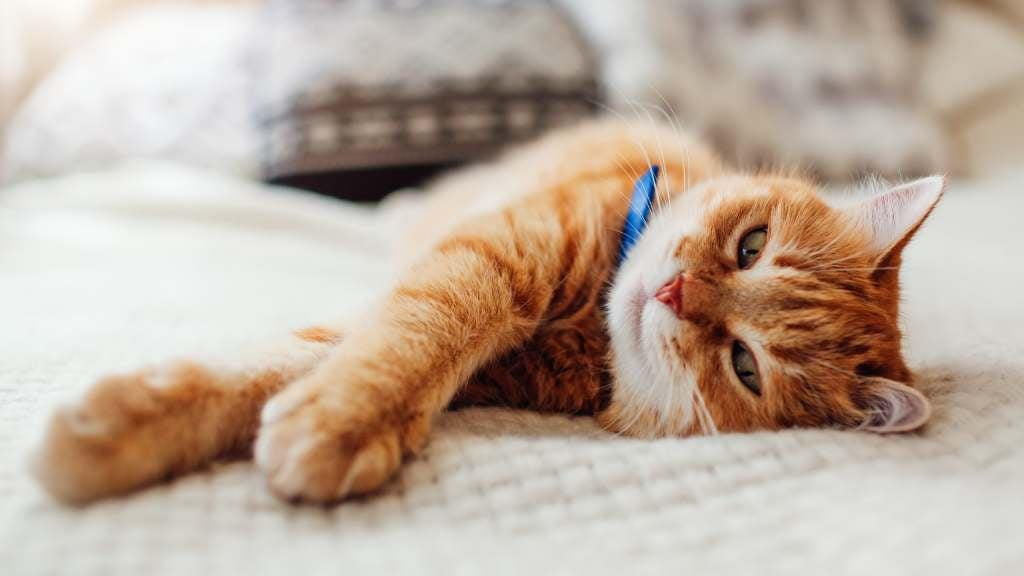

In [65]:
Image.open(path_dict['cats'][0])

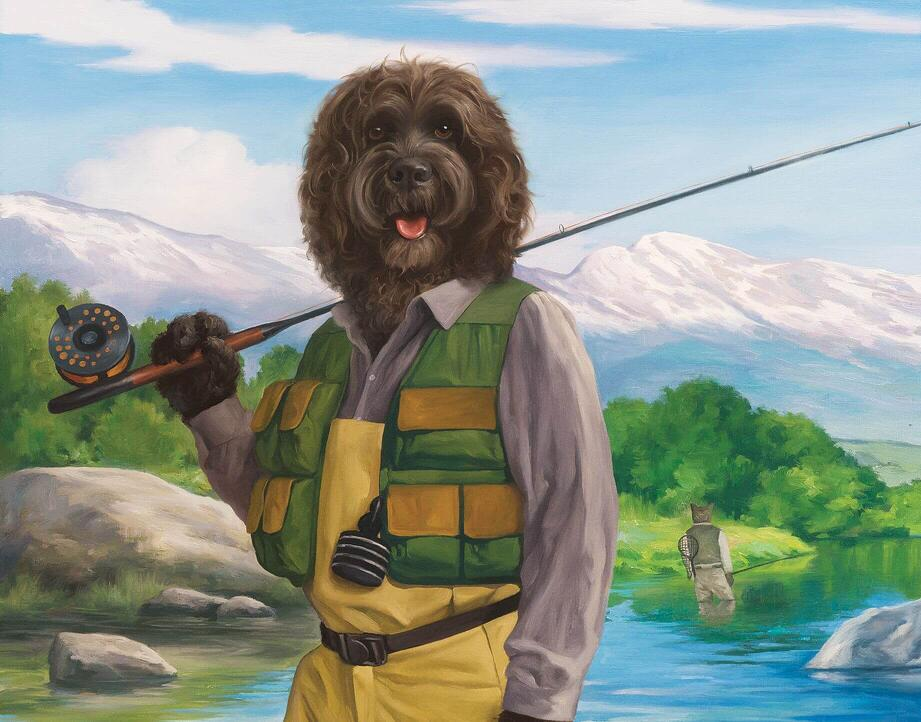

In [66]:
Image.open(path_dict['dogs'][11])

In [67]:
import cv2

In [68]:
path_dict.keys()

dict_keys(['cats', 'dogs'])

In [69]:
img_arr_list = []
labels = []
for key, val in path_dict.items():
    for path in val:
        img_arr = cv2.imread(path)
        resized_img = cv2.resize(img_arr, (224, 224))
        img_arr_list.append(resized_img)
        labels.append(key)

In [70]:
img_arr_list

[array([[[239, 244, 247],
         [241, 246, 249],
         [240, 245, 248],
         ...,
         [117, 144, 171],
         [122, 149, 176],
         [127, 154, 181]],
 
        [[239, 244, 247],
         [241, 246, 249],
         [240, 245, 248],
         ...,
         [115, 142, 169],
         [120, 147, 174],
         [125, 152, 179]],
 
        [[239, 244, 247],
         [241, 246, 249],
         [240, 245, 248],
         ...,
         [112, 139, 166],
         [118, 146, 173],
         [123, 150, 177]],
 
        ...,
 
        [[209, 216, 211],
         [209, 216, 211],
         [207, 214, 209],
         ...,
         [206, 211, 214],
         [207, 212, 215],
         [207, 212, 215]],
 
        [[209, 216, 211],
         [209, 216, 211],
         [207, 214, 209],
         ...,
         [206, 211, 214],
         [207, 212, 215],
         [207, 212, 215]],
 
        [[209, 216, 211],
         [209, 216, 211],
         [207, 214, 209],
         ...,
         [206, 211, 214],
  

In [71]:
img_arr_list= np.array(img_arr_list)

In [72]:
img_arr_list.shape

(697, 224, 224, 3)

In [73]:
labels = np.array(labels)

In [74]:
labels.shape

(697,)

In [75]:
labels

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
      

In [78]:
encoded = np.array([0 if label == 'cats' else 1 for label in labels])

print(encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_arr_list, encoded, test_size=0.2)

In [82]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)

/Users/shonty/Desktop/python/tf-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 856ms/step - accuracy: 0.4956 - loss: 1.0363
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 882ms/step - accuracy: 0.5316 - loss: 0.6964
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 905ms/step - accuracy: 0.5730 - loss: 0.6948
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 891ms/step - accuracy: 0.5289 - loss: 0.6973
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 940ms/step - accuracy: 0.5437 - loss: 0.6855
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 999ms/step - accuracy: 0.5285 - loss: 0.6855
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 955ms/step - accuracy: 0.6460 - loss: 0.6712
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 953ms/step - accuracy: 0.6914 - loss: 0.5802
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 947ms/step - accuracy: 0.7072 - loss: 0.5823
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 947ms/step - accuracy: 0.7526 - loss: 0.5097


In [84]:
pred=model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


In [86]:
model.evaluate(x_train, y_train)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.7212 - loss: 0.5495


[0.5414002537727356, 0.7181328535079956]

In [87]:
pred = [(pred> 0.5).astype(int)]

In [88]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0])

In [89]:
model.save('cat_dog_model.h5')